$$
\Huge \text{TEORIA PERKOLACJI W POŻARACH LASÓW}
$$

$$
\Large \text{Autorzy: Alicja Górnik, Ewa Herman, Julia Krempińska, Jagoda Płócienniczak}
$$

In [1664]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image, ImageDraw
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

$
\huge \textbf{Prezentacja 3}
$

#### 1. Drzewa mogą znajdować się w następujących stanach, opisanych poszczególnymi kolorami:
- 0 - brak drzewa (kolor biały)
- 1 - drzewo (kolor zielony)
- 2 - palące się drzewo (kolor czerwony)
- 3 - spalone drzewo (kolor szary)

In [1665]:
tree_cond = {"EMPTY": 0, "TREE": 1, "BURNING": 2, "BURNED": 3}
tree_color = {0: "white", 1: "green", 2: "red", 3: "grey"}

#### 2. Poczatkowe parametry siatki 2D.

In [1666]:
size = 50  
p_fire = 0.7  
p_tree = 0.5  

#### 3. Początkowa siatka 2D (jeszcze przed pożarem).

In [1667]:
cmap = ListedColormap(tree_color.values())

In [1668]:
def forest_grid(size, p_tree):
    forest = np.random.choice([tree_cond["EMPTY"], tree_cond["TREE"]], size=(size, size), p=[1-p_tree, p_tree])
    return forest

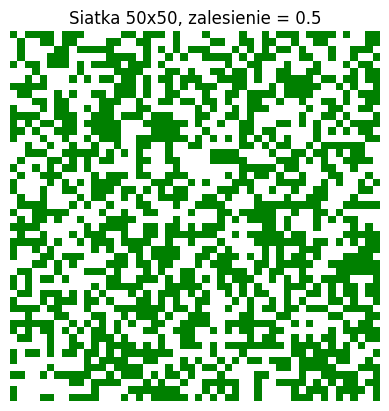

In [1669]:
grid = forest_grid(size, p_tree)
plt.imshow(grid, cmap=cmap, vmin=0, vmax=3)
plt.axis('off')
plt.title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
plt.show()

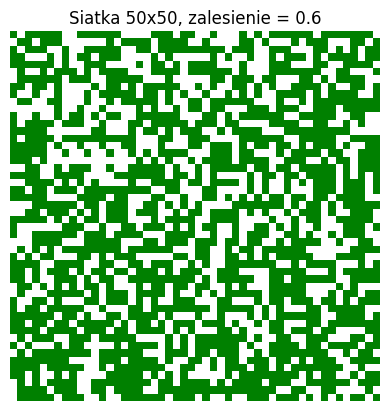

In [1670]:
size = 50  
p_tree = 0.6  

grid = forest_grid(size, p_tree)
plt.imshow(grid, cmap=cmap, vmin=0, vmax=3)
plt.axis('off')
plt.title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
plt.show()

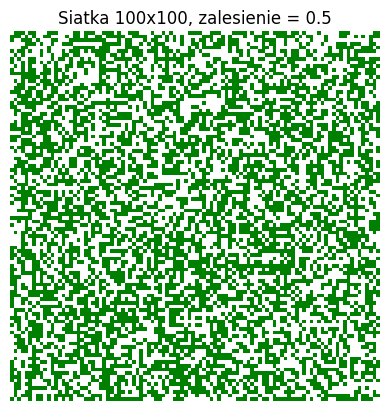

In [1671]:
size = 100  
p_tree = 0.5 

grid = forest_grid(size, p_tree)
plt.imshow(grid, cmap=cmap, vmin=0, vmax=3)
plt.axis('off')
plt.title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
plt.show()

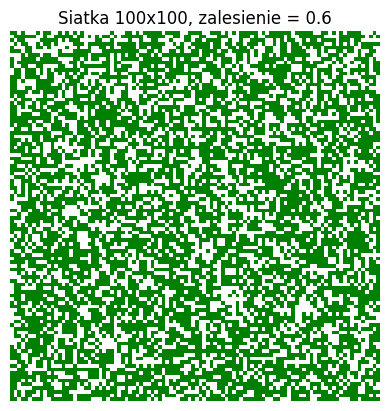

In [1672]:
size = 100 
p_tree = 0.6 

grid = forest_grid(size, p_tree)
plt.imshow(grid, cmap=cmap, vmin=0, vmax=3)
plt.axis('off')
plt.title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
plt.show()

#### 4. Sąsiedztwo (Von Neumanna i Moore'a)

In [1673]:
def get_neighbors(x, y, size, neighborhood):
    if neighborhood == "von_neumann":
        neighbors = np.array([(x-1, y), (x+1, y), (x, y-1), (x, y+1)])
    elif neighborhood == "moore":
        neighbors = np.array([(x-1, y-1), (x-1, y), (x-1, y+1),  
                            (x, y-1), (x, y+1),             
                            (x+1, y-1), (x+1, y), (x+1, y+1)])
    else:
        return [] 
    neighbors = [(nx, ny) for nx, ny in neighbors if 0 <= nx < size and 0 <= ny < size] 
    return neighbors

#### 5. Pożar i jego rozprzestrzenianie się

In [1674]:
def start_fire(forest_before_fire):
    forest = forest_before_fire.copy()
    forest[0, :] = np.where(forest[0, :] == tree_cond["TREE"], tree_cond["BURNING"], forest[0, :])
    return forest

In [1675]:
def spread_fire(forest_with_fire, size, p_fire, neighborhood):
    new_forest = forest_with_fire.copy()
    size = forest_with_fire.shape[0]

    for x in range(size):
        for y in range(size):
            if forest_with_fire[x, y] == tree_cond["BURNING"]:
                new_forest[x, y] = tree_cond["BURNED"]
                
                for nx, ny in get_neighbors(x, y, size, neighborhood):
                    if forest_with_fire[nx, ny] == tree_cond["TREE"]:
                        if np.random.rand() < p_fire:
                            new_forest[nx, ny] = tree_cond["BURNING"]
    return new_forest

#### 6. Symulacja rozprzestrzeniania się ognia

In [1676]:
def fire_simulation(size, p_fire, p_tree, neighborhood, gif_name, M_frames=100):
    forest = forest_grid(size, p_tree)
    frames = []

    for step in range(M_frames):
        if step == 0:
            fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
            ax.imshow(forest, cmap=cmap, vmin=0, vmax=3)
            ax.axis('off')
            ax.set_title(f'Pusty las {size}x{size}, zalesienie = {p_tree}')
            plt.draw()
            fig.canvas.draw()
            buf = fig.canvas.buffer_rgba()
            image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
            frames.append(image)
            plt.close(fig)

        elif step == 1:
            forest = start_fire(forest)
            fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
            ax.imshow(forest, cmap=cmap, vmin=0, vmax=3)
            ax.axis('off')
            ax.set_title(f'Siatka {size}x{size}, zalesienie = {p_tree}')
            plt.draw()
            fig.canvas.draw()
            buf = fig.canvas.buffer_rgba()
            image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
            frames.append(image)
            plt.close(fig)

        else:
            forest = spread_fire(forest, size, p_fire, neighborhood)
            fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
            ax.imshow(forest, cmap=cmap, vmin=0, vmax=3)
            ax.axis('off')
            ax.set_title(f'Siatka {size}x{size}, zalesienie = {p_tree}, {neighborhood}')
            plt.draw()
            fig.canvas.draw()

            buf = fig.canvas.buffer_rgba()
            image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
            frames.append(image)
            plt.close(fig)

    frames[0].save(f'{gif_name}.gif', save_all=True, append_images=frames[1:], loop=0, duration=200)
    print(f"Animacja została zapisana jako '{gif_name}.gif'")

In [1677]:
# fire_simulation(size = 50, p_fire = 1, p_tree = 0.5, neighborhood="von_neumann", gif_name = f"Neumann_50x50_05", M_frames=50)

In [1678]:
# fire_simulation(size = 50, p_fire = 1, p_tree = 0.6, neighborhood="von_neumann", gif_name = f"Neumann_50x50_06", M_frames=150)

In [1679]:
# fire_simulation(size = 50, p_fire = 1, p_tree = 0.7, neighborhood="von_neumann", gif_name = f"Neumann_50x50_07", M_frames=100)

In [1680]:
# fire_simulation(size = 50, p_fire = 1, p_tree = 0.4, neighborhood="moore", gif_name = f"Moore_50x50_04", M_frames=100)

In [1681]:
# fire_simulation(size = 50, p_fire = 1, p_tree = 0.5, neighborhood="moore", gif_name = f"Moore_50x50_05", M_frames=100)

#### 7. Szybkość rozprzestrzeniania się pożaru.

In [1682]:
def how_much_burned(size, p_fire, p_tree, neighborhood, M=100):
    burned = np.zeros(M)
    forest = forest_grid(size, p_tree)
    total_trees = np.sum(forest == tree_cond["TREE"])
    forest = start_fire(forest)
    
    for step in range(M):
        burned_trees = np.sum(forest == tree_cond["BURNED"]) + np.sum(forest == tree_cond["BURNING"])
        burned[step] = (burned_trees / total_trees) * 100 if total_trees > 0 else 0
        forest = spread_fire(forest, size, p_fire, neighborhood)

    return burned, np.arange(M)

##### 7.1. Rozprzestrzenianie się pożaru VS n-ty krok symulacji

- Przypadek jednej symulacji / jednego wyniku

In [1683]:
M = 200
p_fire, p_tree = 1, 0.6
size = 50

In [1684]:
# burned_neumann_v1, steps = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
# burned_moore_v1, _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

In [1685]:
# plt.figure(figsize=(6, 4))
# plt.plot(steps, burned_moore_v1, label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(steps, burned_neumann_v1, label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Krok symulacji')
# plt.ylabel('Rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {0.6}\np_fire = {1.0}\ngrid_size = {size}x{size}"
# plt.text(0.98, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower right")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("burned_vs_steps.png", dpi=300)
# plt.show()

- Średnia z 100 symulacji

In [1686]:
N = 100
M = 200
p_fire, p_tree = 1, 0.6
size = 50

In [1687]:
# burned_neumann_v2 = np.zeros((N, M))
# burned_moore_v2 = np.zeros((N, M))
# steps = np.arange(M)

# for i in range(N):
#     burned_neumann_v2[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
#     burned_moore_v2[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

# avg_burned_neumann = np.mean(burned_neumann_v2, axis=0)
# avg_burned_moore = np.mean(burned_moore_v2, axis=0)

In [1688]:
# plt.figure(figsize=(6, 4))
# plt.plot(steps, avg_burned_moore, label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(steps, avg_burned_neumann, label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Krok symulacji')
# plt.ylabel('Średni rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {0.6}\np_fire = {1.0}\ngrid_size = {size}x{size}"
# plt.text(0.98, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower right")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("avg100_burned_vs_steps.png", dpi=300)
# plt.show()

##### 7.2. Rozprzestrzenianie się pożaru VS wartość zalesienia (p_tree)

- Przypadek jednej symulacji / jednego wyniku

In [1689]:
M = 200
p_fire = 1
p_tree_values = np.arange(0.1, 1.1, 0.1)
size = 50

In [1690]:
# burned_neumann_v3 = np.zeros((len(p_tree_values), M))
# burned_moore_v3 = np.zeros((len(p_tree_values), M))
# steps = np.arange(M)

# for i, p_tree in enumerate(p_tree_values):
#     burned_neumann_v3[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
#     burned_moore_v3[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

In [1691]:
# plt.figure(figsize=(6, 4))
# plt.plot(p_tree_values, burned_moore_v3[:,-1], label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(p_tree_values, burned_neumann_v3[:,-1], label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Prawdopodobieństwo zalesienia (p_tree)')
# plt.ylabel('Rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {p_tree}\np_fire = {p_fire}\ngrid_size = {size}x{size}\nsim_steps = {M}"
# plt.text(0.98, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower right")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("burned_vs_tree.png", dpi=300)
# plt.show()

- Średnia z 100 symulacji

In [1692]:
N = 100
M = 200
p_fire = 1
p_tree_values = np.arange(0.1, 1.1, 0.1)
size = 50

In [1693]:
# burned_neumann_v4 = np.zeros((len(p_tree_values), N))
# burned_moore_v4 = np.zeros((len(p_tree_values), N))

# for j in range(N):
#     for i, p_tree in enumerate(p_tree_values):
#         burned_neumann, _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
#         burned_moore, _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

#         burned_neumann_v4[i, j] = burned_neumann[-1]
#         burned_moore_v4[i, j] = burned_moore[-1]

# avg_burned_neumann_v2 = np.mean(burned_neumann_v4, axis=1)
# avg_burned_moore_v2 = np.mean(burned_moore_v4, axis=1)

In [1694]:
# plt.figure(figsize=(6, 4))
# plt.plot(p_tree_values, avg_burned_moore_v2, label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(p_tree_values, avg_burned_neumann_v2, label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Prawdopodobieństwo zalesienia (p_tree)')
# plt.ylabel('Średni rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {p_tree}\np_fire = {p_fire}\ngrid_size = {size}x{size}\nsim_steps = {M}"
# plt.text(0.98, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower right")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("avg100_burned_vs_tree.png", dpi=300)
# plt.show()

##### 7.2. Rozprzestrzenianie się pożaru VS rozmiar siatki (size)

- Przypadek jednej symulacji / jednego wyniku

In [1695]:
M = 200
p_fire, p_tree = 1, 0.6
size_values = np.arange(50, 300, 50)

In [1696]:
# burned_neumann_v5 = np.zeros((len(size_values), M))
# burned_moore_v5 = np.zeros((len(size_values), M))

# for i, size in enumerate(size_values):
#     burned_neumann_v5[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
#     burned_moore_v5[i,:], _ = how_much_burned(size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

In [1697]:
# plt.figure(figsize=(6, 4))
# plt.plot(size_values, burned_moore_v5[:,-1], label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(size_values, burned_neumann_v5[:,-1], label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Rozmiar siatki (size)')
# plt.ylabel('Rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {0.6}\np_fire = {p_fire}\nsim_steps = {M}"
# plt.text(0.23, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower left")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("burned_vs_size.png", dpi=300)
# plt.show()

- Średnia z 100 symulacji

In [1698]:
M = 200
N = 100
p_fire, p_tree = 1, 0.6
size_values = np.arange(50, 300, 50)

In [1699]:
# burned_neumann_v6 = np.zeros((len(size_values), N))
# burned_moore_v6 = np.zeros((len(size_values), N))

# for j in range(N):
#     for i, size in enumerate(size_values):
#         burned_neumann, _ = how_much_burned(size=size, p_fire=p_fire, p_tree=p_tree, neighborhood="von_neumann", M=M)
#         burned_moore, _ = how_much_burned(size=size, p_fire=p_fire, p_tree=p_tree, neighborhood="moore", M=M)

#         burned_neumann_v6[i, j] = burned_neumann[-1]
#         burned_moore_v6[i, j] = burned_moore[-1]

# avg_burned_neumann_v3 = np.mean(burned_neumann_v6, axis=1)
# avg_burned_moore_v3 = np.mean(burned_moore_v6, axis=1)

In [1700]:
# plt.figure(figsize=(6, 4))
# plt.plot(size_values, avg_burned_moore_v3, label="Sąsiedztwo Moore'a", color="blue")
# plt.plot(size_values, avg_burned_neumann_v3, label="Sąsiedztwo von Neumanna", color="orange")
# plt.xlabel('Rozmiar siatki (size)')
# plt.ylabel('Średni rozmiar spalonego obszaru (%)')
# param_text = f"p_tree = {p_tree}\np_fire = {p_fire}\nsim_steps = {M}"
# plt.text(0.23, 0.2, param_text,
#          transform=plt.gca().transAxes,  
#          fontsize=9,
#          verticalalignment='bottom',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
# plt.legend(loc = "lower left")
# plt.grid(True, linestyle = '--')
# plt.tight_layout()
# #plt.savefig("avg100_burned_vs_size.png", dpi=300)
# plt.show()

$
\huge \textbf{Prezentacja 4}
$

#### 5. Las nie jest jednolity - mogą występować różne rodzaje drzew co wpływa na łatwość ich zapalenia (p_tree). Na ten moment rozważamy najprosztszą sytuację:
- 0 - brak drzewa
- 1 - drzewo łatwopalne (kolor jasnozielony)
- 2 - drzewo trudnopalne (kolor ciemnozielony)

In [1701]:
tree_type = {"NONE": 0, "Łatwopalne": 1, "Trudnopalne": 2}
tree_type_color = {
    tree_type["NONE"]: "white",
    tree_type["Łatwopalne"]: "yellowgreen",
    tree_type["Trudnopalne"]: "green"
}

In [1702]:
p_fire_type = {
    tree_type["Łatwopalne"]: 1.0,
    tree_type["Trudnopalne"]: 0
}

In [1703]:
def forest_grid_with_type(size, p_tree, tree_ratio=[0.3, 0.7]):
    forest = forest_grid(size, p_tree) 
    forest_type = np.full((size, size), tree_type["NONE"])

    for x in range(size):
        for y in range(size):
            if forest[x, y] == tree_cond["TREE"]:
                forest_type[x, y] = np.random.choice([tree_type["Łatwopalne"], tree_type["Trudnopalne"]], p=tree_ratio)
    return forest, forest_type

##### 5.1. Siatka lasu z różnymi typami drzew

In [1704]:
def draw_forest_with_type(grid_type, colors, legend_labels, p_tree):
    cmap = ListedColormap(colors.values())
    vmin, vmax = min(colors.keys()), max(colors.keys())

    plt.figure(figsize=(6,4))
    plt.imshow(grid_type, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.title(f'Siatka {grid_type.shape[0]}x{grid_type.shape[1]}, zalesienie = {p_tree}')

    legend_elements = [mpatches.Patch(color=colors[tree_type[label]], label=label) for label in legend_labels]
    plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.6, 1.0), title="Rodzaje drzew: ")
    plt.show()

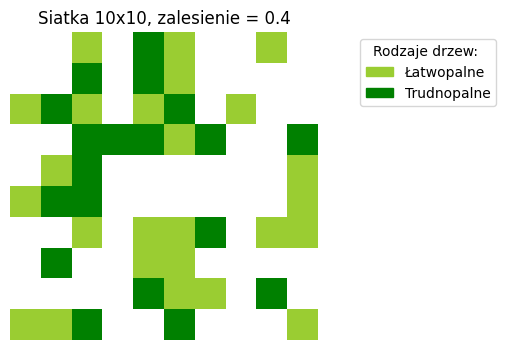

In [1705]:
size = 10
p_tree = 0.4
_, grid_type = forest_grid_with_type(size, p_tree, tree_ratio=[0.5, 0.5])
draw_forest_with_type(grid_type, tree_type_color, ["Łatwopalne", "Trudnopalne"], p_tree)

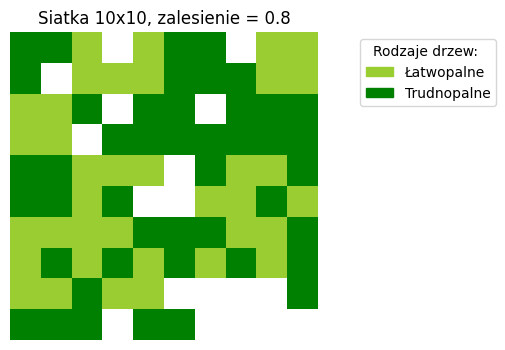

In [1706]:
size = 10
p_tree = 0.8
_, grid_type = forest_grid_with_type(size, p_tree, tree_ratio=[0.5, 0.5])
draw_forest_with_type(grid_type, tree_type_color, ["Łatwopalne", "Trudnopalne"], p_tree)

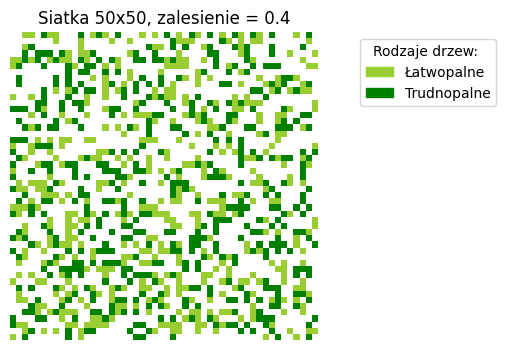

In [1707]:
size = 50
p_tree = 0.4
_, grid_type = forest_grid_with_type(size, p_tree, tree_ratio=[0.5, 0.5])
draw_forest_with_type(grid_type, tree_type_color, ["Łatwopalne", "Trudnopalne"], p_tree)

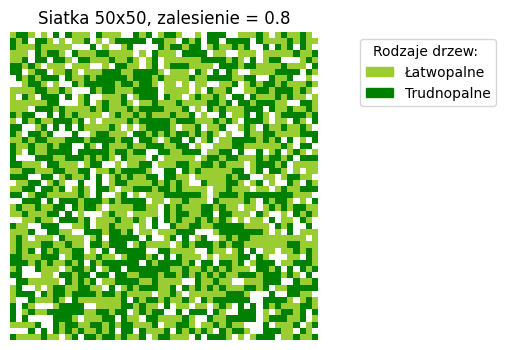

In [1708]:
size = 50
p_tree = 0.8
_, grid_type = forest_grid_with_type(size, p_tree, tree_ratio=[0.5, 0.5])
draw_forest_with_type(grid_type, tree_type_color, ["Łatwopalne", "Trudnopalne"], p_tree)

##### 5.2. Rozprzestrzenianie się pożaru w lesie z różnymi typami drzew

In [1709]:
def spread_fire(forest_with_fire, size, p_fire, neighborhood):
    new_forest = forest_with_fire.copy()
    size = forest_with_fire.shape[0]

    for x in range(size):
        for y in range(size):
            if forest_with_fire[x, y] == tree_cond["BURNING"]:
                new_forest[x, y] = tree_cond["BURNED"]
                
                for nx, ny in get_neighbors(x, y, size, neighborhood):
                    if forest_with_fire[nx, ny] == tree_cond["TREE"]:
                        if np.random.rand() < p_fire:
                            new_forest[nx, ny] = tree_cond["BURNING"]
    return new_forest

In [1710]:
def spread_fire(forest_with_fire, forest_type, p_fire_type, neighborhood):
    new_forest = forest_with_fire.copy()
    size = forest_with_fire.shape[0]

    for x in range(size):
        for y in range(size):
            if forest_with_fire[x, y] == tree_cond["BURNING"]:
                new_forest[x, y] = tree_cond["BURNED"]
                
                for nx, ny in get_neighbors(x, y, size, neighborhood):
                    if forest_with_fire[nx, ny] == tree_cond["TREE"]:
                        t_type = forest_type[nx, ny]
                        p_fire = p_fire_type.get(t_type, 0.0)
                        if np.random.rand() < p_fire:
                            new_forest[nx, ny] = tree_cond["BURNING"]
    return new_forest

In [1711]:
def get_colored_forest(forest, forest_type):
    size = forest.shape[0]
    rgb_array = np.zeros((size, size, 3), dtype=np.uint8)

    for x in range(size):
        for y in range(size):
            cell = forest[x, y]
            if cell == tree_cond["TREE"]:
                t_type = forest_type[x, y]
                color_name = tree_type_color.get(t_type, "green")
            else:
                color_name = tree_color.get(cell, "white")

            rgb = np.array(mcolors.to_rgb(color_name)) * 255
            rgb_array[x, y] = rgb.astype(np.uint8)
    return rgb_array

In [1712]:
def fire_simulation_type(size, p_tree, tree_ratio, p_fire_type, neighborhood, gif_name, M_frames=100):
    forest, forest_type = forest_grid_with_type(size, p_tree, tree_ratio)
    frames = []
    legend_elements = [mpatches.Patch(color=tree_type_color[tree_type[label]], label=label) for label in tree_type if label != 'NONE']

    for step in range(M_frames):
        if step == 0:
            fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
            colored_forest = get_colored_forest(forest, forest_type)
            ax.imshow(colored_forest)
            ax.axis('off')
            ax.set_title(f'Siatka {size}x{size}, zalesienie = {p_tree}, sąsiedztwo = {neighborhood}')
            ax.legend(handles=legend_elements, loc="lower left", title_fontsize=14, fontsize=12, borderpad=1.0, bbox_to_anchor=(-0.1, -0.1), title="Rodzaje drzew")
            plt.draw()
            fig.canvas.draw()
            buf = fig.canvas.buffer_rgba()
            image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
            frames.append(image)
            plt.close(fig)

        elif step == 1:
            forest = start_fire(forest)
            fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
            colored_forest = get_colored_forest(forest, forest_type)
            ax.imshow(colored_forest)
            ax.axis('off')
            ax.set_title(f'Siatka {size}x{size}, zalesienie = {p_tree}, sąsiedztwo = {neighborhood}')
            ax.legend(handles=legend_elements, loc="lower left", title_fontsize=14, fontsize=12, borderpad=1.0, bbox_to_anchor=(-0.1, -0.1), title="Rodzaje drzew")
            plt.draw()
            fig.canvas.draw()
            buf = fig.canvas.buffer_rgba()
            image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
            frames.append(image)
            plt.close(fig)

        else:
            forest = spread_fire(forest, forest_type, p_fire_type, neighborhood)
            fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
            colored_forest = get_colored_forest(forest, forest_type)
            ax.imshow(colored_forest)
            ax.axis('off')
            ax.set_title(f'Siatka {size}x{size}, zalesienie = {p_tree}, sąsiedztwo = {neighborhood}')
            ax.legend(handles=legend_elements, loc="lower left", title_fontsize=14, fontsize=12, borderpad=1.0, bbox_to_anchor=(-0.1, -0.1), title="Rodzaje drzew")
            plt.draw()
            fig.canvas.draw()

            buf = fig.canvas.buffer_rgba()
            image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
            frames.append(image)
            plt.close(fig)

    frames[0].save(f'{gif_name}.gif', save_all=True, append_images=frames[1:], loop=0, duration=200)
    print(f"Animacja została zapisana jako '{gif_name}.gif'")


In [1713]:
p_fire_type = {tree_type["Łatwopalne"]: 1.0, tree_type["Trudnopalne"]: 0}

fire_simulation_type(50,0.6,[0.5,0.5], p_fire_type, 'moore', 'moore_fire1x0')

fire_simulation_type(50,0.6,[0.5,0.5], p_fire_type, 'von_neumann', 'neumann_fire1x0')

Animacja została zapisana jako 'moore_fire1x0.gif'
Animacja została zapisana jako 'neumann_fire1x0.gif'


In [1714]:
p_fire_type = {tree_type["Łatwopalne"]: 0.7, tree_type["Trudnopalne"]: 0.3}

fire_simulation_type(50,0.6,[0.5,0.5], p_fire_type, 'moore', 'moore_fire0.7x0.3')

fire_simulation_type(50,0.6,[0.5,0.5], p_fire_type, 'von_neumann', 'neumann_fire0.7x0.3')

Animacja została zapisana jako 'moore_fire0.7x0.3.gif'
Animacja została zapisana jako 'neumann_fire0.7x0.3.gif'
